<a href="https://colab.research.google.com/github/stefanjacim/exam_task/blob/main/financial_phrasebank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*A dataset of sentences from financial news, divided into positive, negative, and neutral; an analysis was done to find the words that appear most often*


In [3]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving Sentences_AllAgree.txt to Sentences_AllAgree.txt


In [4]:
file_name = "Sentences_AllAgree.txt"
df = pd.read_csv(file_name, delimiter='@',header=None, names=["Sentence", "Sentiment"], encoding="latin-1")

df.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [5]:
broj_redova = df['Sentiment'].value_counts()
print(broj_redova)


Sentiment
neutral     1391
positive     570
negative     303
Name: count, dtype: int64


Text(0, 0.5, 'broj recenica')

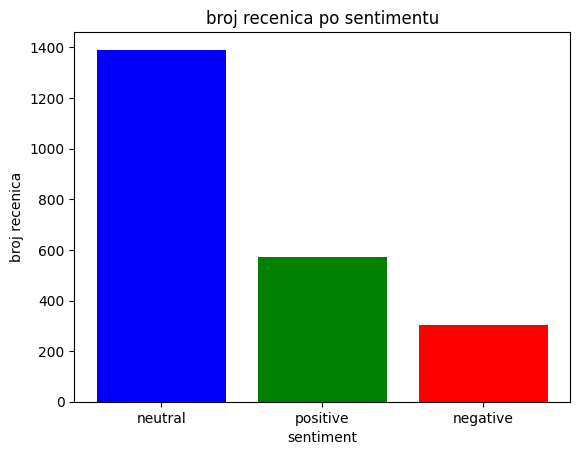

In [6]:
import matplotlib.pyplot as plt

plt.bar(broj_redova.index, broj_redova.values, color = ['blue', 'green', 'red'])
plt.title("broj recenica po sentimentu")
plt.xlabel("sentiment")
plt.ylabel("broj recenica")

In [12]:
#pretvaramo celu kolonu Sentence u mala slova
df["Sentence"] = df["Sentence"].str.lower()
#uklanjanje nepotrebnih znakova
df["Sentence"] = df["Sentence"].str.replace(r"[^a-zA-Zčćžšđ\s]", "", regex=True)

In [21]:
import nltk
from nltk.tokenize import word_tokenize

#tokenizacija reci
nltk.download("punkt")
nltk.download("punkt_tab")
df["Tokens"] = df["Sentence"].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
#otklanjanje stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
df["Tokens"] = df["Tokens"].apply(lambda tokens: [w for w in tokens if w not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,Sentiment,Tokens
0,according to gran the company has no plans to...,neutral,"[according, gran, company, plans, move, produc..."
1,for the last quarter of componenta s net sal...,positive,"[last, quarter, componenta, net, sales, double..."
2,in the third quarter of net sales increased ...,positive,"[third, quarter, net, sales, increased, eur, m..."
3,operating profit rose to eur mn from eur mn ...,positive,"[operating, profit, rose, eur, mn, eur, mn, co..."
4,operating profit totalled eur mn up from eur...,positive,"[operating, profit, totalled, eur, mn, eur, mn..."


In [42]:
#otklanjanje reci po sopostvenom izboru
custom_stopwords = {"to", "a", "the", "from", "eur", "mn", "mln", "milion", "oyj", "also", "million"}

df["Tokens"] = df["Tokens"].apply(lambda tokens: [w for w in tokens if w not in custom_stopwords])

In [66]:
#najcesce reci
from collections import Counter


def top_words_by_sentiment(df, sentiment, n=20):

    tokens = df[df["Sentiment"] == sentiment]["Tokens"].sum()
    counter = Counter(tokens)
    return counter.most_common(n)


top_positive = top_words_by_sentiment(df, "positive", n=20)
top_negative = top_words_by_sentiment(df, "negative", n=20)
top_neutral  = top_words_by_sentiment(df, "neutral", n=20)

print("najcesce pozitivne reci:\n", top_positive, "\n")
print("najcesce negativne reci:\n", top_negative, "\n")
print("najcesce neutralne reci:\n", top_neutral)


najcesce pozitivne reci:
 [('profit', 172), ('net', 166), ('sales', 129), ('period', 125), ('finnish', 105), ('operating', 103), ('said', 100), ('year', 94), ('company', 86), ('quarter', 82), ('rose', 82), ('increased', 74), ('loss', 60), ('corresponding', 59), ('euro', 59), ('compared', 58), ('group', 49), ('first', 49), ('percent', 48), ('share', 45)] 

najcesce negativne reci:
 [('profit', 122), ('net', 84), ('sales', 72), ('operating', 68), ('quarter', 62), ('period', 58), ('finnish', 57), ('decreased', 52), ('year', 52), ('loss', 51), ('compared', 42), ('first', 42), ('company', 38), ('euro', 38), ('fell', 35), ('said', 34), ('corresponding', 34), ('half', 26), ('earlier', 23), ('totalled', 22)] 

najcesce neutralne reci:
 [('company', 225), ('finland', 108), ('shares', 105), ('business', 96), ('group', 93), ('services', 82), ('share', 74), ('said', 72), ('new', 59), ('market', 59), ('sales', 59), ('finnish', 57), ('value', 57), ('total', 56), ('well', 53), ('capital', 52), ('prod

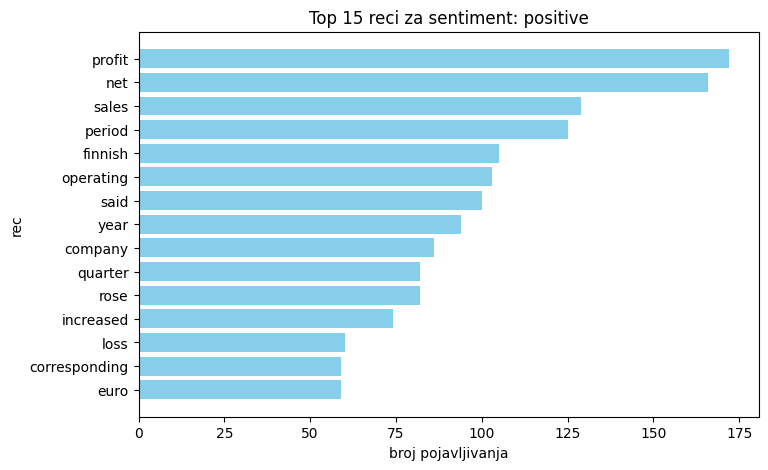

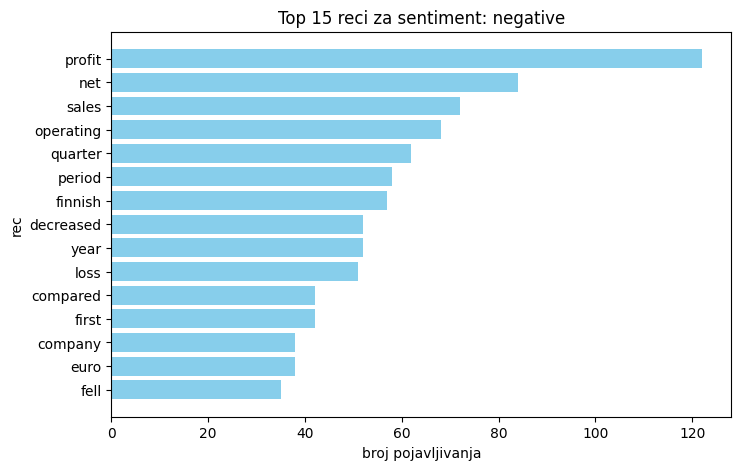

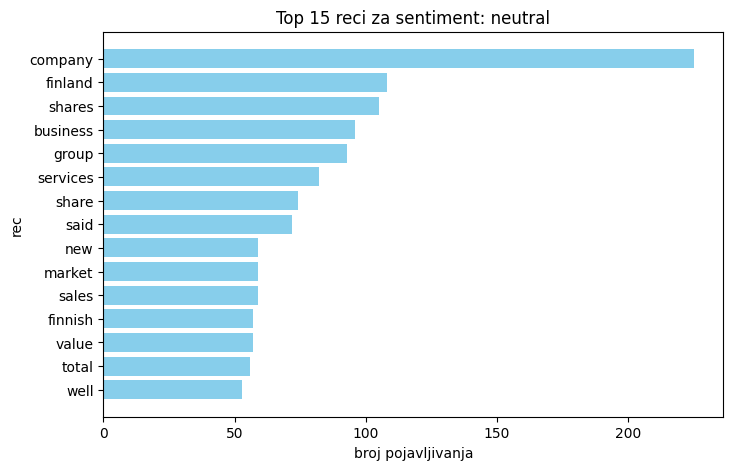

In [48]:
#vizualizacija
import matplotlib.pyplot as plt

def plot_top_words(df, sentiment, n=10):
    tokens = df[df["Sentiment"] == sentiment]["Tokens"].sum()
    counter = Counter(tokens)
    common = counter.most_common(n)

    words, counts = zip(*common)

    plt.figure(figsize=(8,5))
    plt.barh(words, counts, color="skyblue")
    plt.xlabel("broj pojavljivanja")
    plt.ylabel("rec")
    plt.title(f"Top {n} reci za sentiment: {sentiment}")
    plt.gca().invert_yaxis()
    plt.show()


plot_top_words(df, "positive", n=15)
plot_top_words(df, "negative", n=15)
plot_top_words(df, "neutral", n=15)


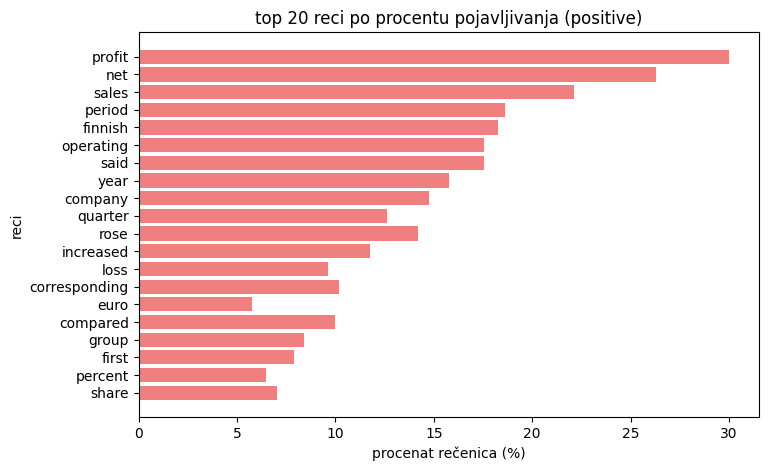

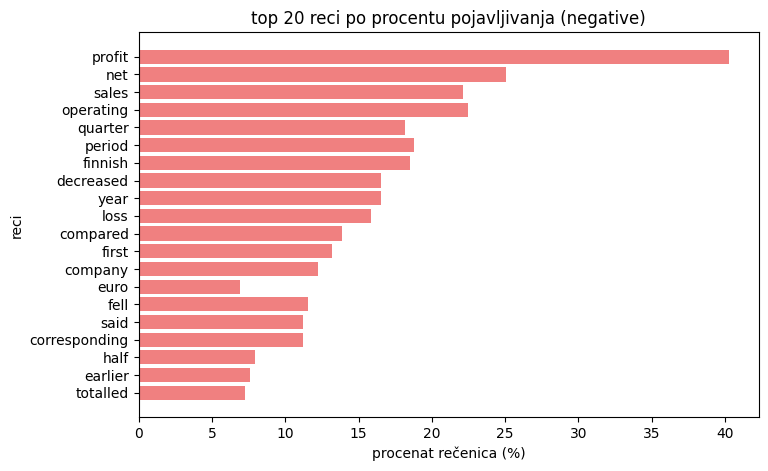

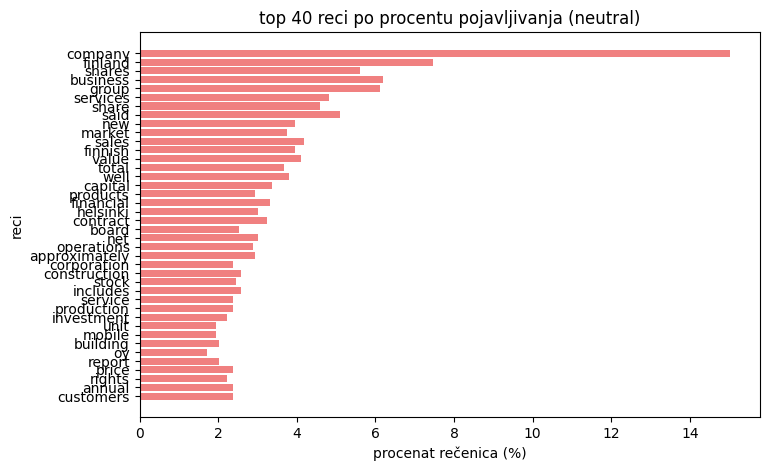

In [65]:
import matplotlib.pyplot as plt
from collections import Counter

def word_percentage(df, sentiment, n=10):
    # filtriraj samo recenice za taj sentiment
    sentiment_df = df[df["Sentiment"] == sentiment]
    total_sentences = len(sentiment_df)

    # spoji sve tokene
    tokens = sentiment_df["Tokens"].sum()
    counter = Counter(tokens)
    common = counter.most_common(n)

    # racunaj procente pojavljivanja po recenicama
    word_percentages = []
    for word, count in common:
        # koliko recenica tog sentimenta sadrži tu rec
        sentences_with_word = sentiment_df["Tokens"].apply(lambda x: word in x).sum()
        percentage = (sentences_with_word / total_sentences) * 100
        word_percentages.append((word, percentage))

    return word_percentages


def plot_word_percentage(df, sentiment, n=10):
    word_percentages = word_percentage(df, sentiment, n)
    words, percentages = zip(*word_percentages)

    plt.figure(figsize=(8,5))
    plt.barh(words, percentages, color="lightcoral")
    plt.xlabel("procenat rečenica (%)")
    plt.ylabel("reci")
    plt.title(f"top {n} reci po procentu pojavljivanja ({sentiment})")
    plt.gca().invert_yaxis()
    plt.show()


# primeri vizualizacije
plot_word_percentage(df, "positive", n=20)
plot_word_percentage(df, "negative", n=20)
plot_word_percentage(df, "neutral", n=40)


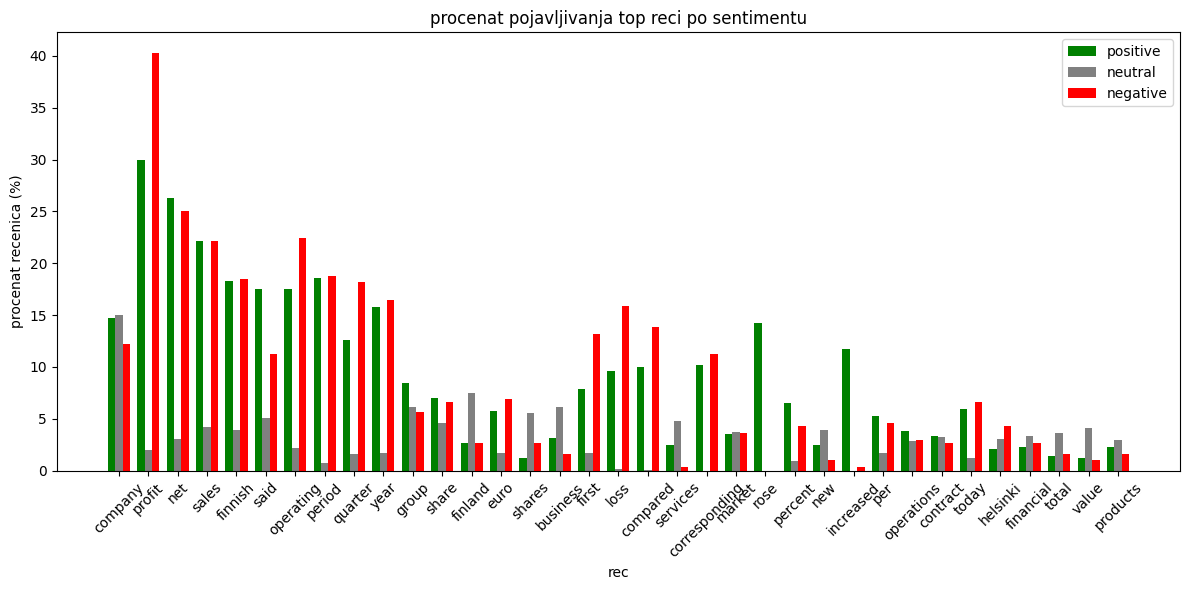

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# prvo izdvoj top N reci ukupno (po frekvenciji u svim sentimentima)
def get_top_words_overall(df, n=10):
    tokens_all = df["Tokens"].sum()
    counter = Counter(tokens_all)
    common = counter.most_common(n)
    return [w for w, _ in common]

# funkcija za izracunavanje procenta pojavljivanja reci po sentimentu
def get_word_percent_by_sentiment(df, word, sentiment):
    sentiment_df = df[df["Sentiment"] == sentiment]
    total_sentences = len(sentiment_df)
    sentences_with_word = sentiment_df["Tokens"].apply(lambda x: word in x).sum()
    return (sentences_with_word / total_sentences) * 100 if total_sentences > 0 else 0

# top 10 reci za prikaz
top_words = get_top_words_overall(df, n=35)

# priprema podataka za graf
percent_positive = [get_word_percent_by_sentiment(df, w, "positive") for w in top_words]
percent_negative = [get_word_percent_by_sentiment(df, w, "negative") for w in top_words]
percent_neutral  = [get_word_percent_by_sentiment(df, w, "neutral")  for w in top_words]

x = np.arange(len(top_words))  # pozicije reci
width = 0.25  # sirina bara

# Crtanje
plt.figure(figsize=(12,6))
plt.bar(x - width, percent_positive, width, label="positive", color="green")
plt.bar(x, percent_neutral, width, label="neutral", color="gray")
plt.bar(x + width, percent_negative, width, label="negative", color="red")

plt.xlabel("rec")
plt.ylabel("procenat recenica (%)")
plt.title("procenat pojavljivanja top reci po sentimentu")
plt.xticks(x, top_words, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
